In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import glob
import os

In [28]:
dfO0 = pd.read_csv('rgb2yuv-control.csv')
dfO3 = pd.read_csv('rgb2yuv-O3.csv')
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})
dfRGB = pd.concat([dfO0, dfO3], ignore_index=True)
dfRGB['Algoritmo'] = dfRGB['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})
dfRGB = dfRGB.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

dfO0 = pd.read_csv('yuv2rgb-control.csv')
dfO3 = pd.read_csv('yuv2rgb-O3.csv')
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})
dfYUV = pd.concat([dfO0, dfO3], ignore_index=True)
dfYUV['Algoritmo'] = dfYUV['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})
dfYUV = dfYUV.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

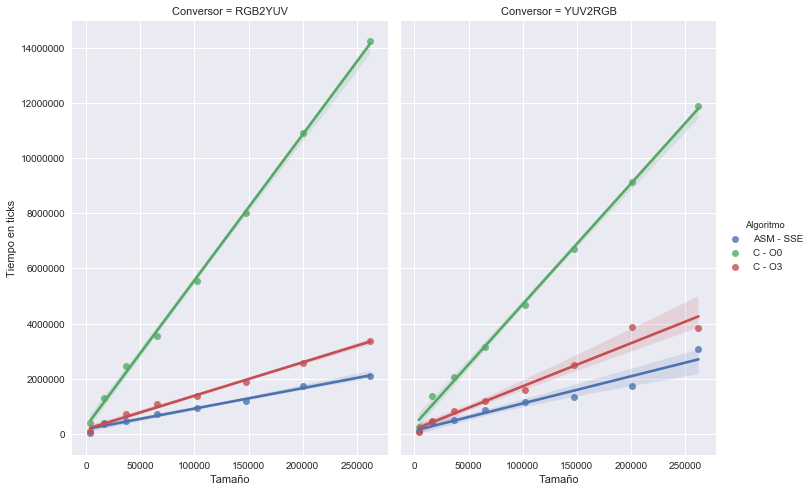

In [29]:
dfRGB.insert(0,"Conversor","RGB2YUV")

dfYUV.insert(0,"Conversor","YUV2RGB")

df = pd.concat([dfRGB, dfYUV], ignore_index=True)

g = sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', col='Conversor', truncate=True, size=7, aspect=0.7)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [34]:
dfO0 = pd.read_csv('fourCombine-control.csv')
dfO3 = pd.read_csv('fourCombine-O3.csv')
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})

dfFourCombine = pd.concat([dfO0, dfO3], ignore_index=True)
dfFourCombine['Algoritmo'] = dfFourCombine['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})
dfFourCombine = dfFourCombine.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

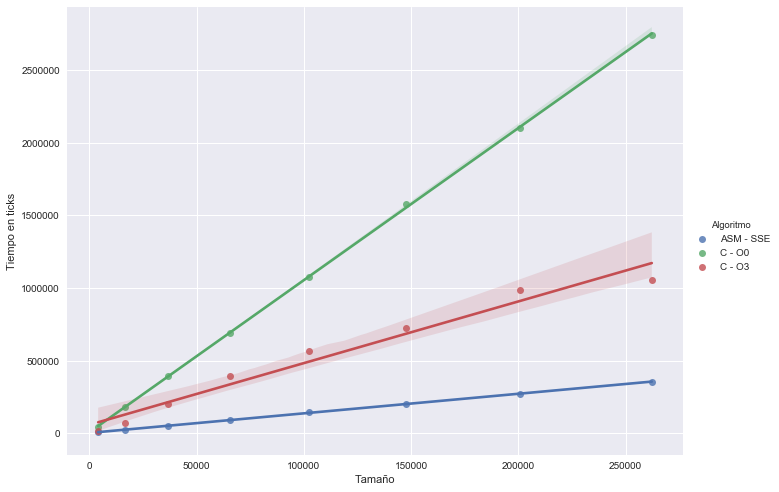

In [36]:
g = sns.lmplot(x='Tamaño', y='Ticks', data=dfFourCombine, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [37]:
dfO0 = pd.read_csv('linearZoom-control.csv')
dfO3 = pd.read_csv('linearZoom-O3.csv')
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})
dfZoom = pd.concat([dfO0, dfO3], ignore_index=True)
dfZoom['Algoritmo'] = dfZoom['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})

dfZoom = dfZoom.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

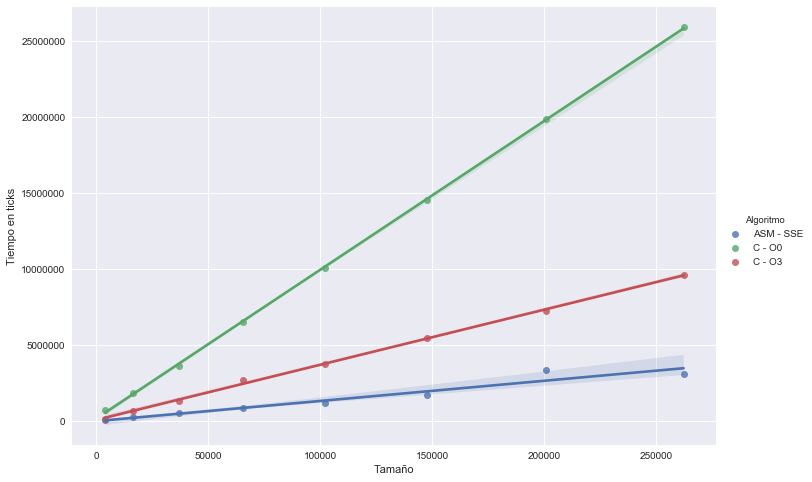

In [38]:
g = sns.lmplot(x='Tamaño', y='Ticks', data=dfZoom, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [42]:
dfO0 = pd.read_csv('maxCloser-control.csv')
dfO3 = pd.read_csv('maxCloser-O3.csv')
dfO3['Algoritmo'] = dfO3['Algoritmo'].map({0: 2})
dfMaxCloser = pd.concat([dfO0, dfO3], ignore_index=True)
dfMaxCloser['Algoritmo'] = dfMaxCloser['Algoritmo'].map({1: 'ASM - SSE', 0: 'C - O0', 2: 'C - O3'})
dfMaxCloser = dfMaxCloser.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

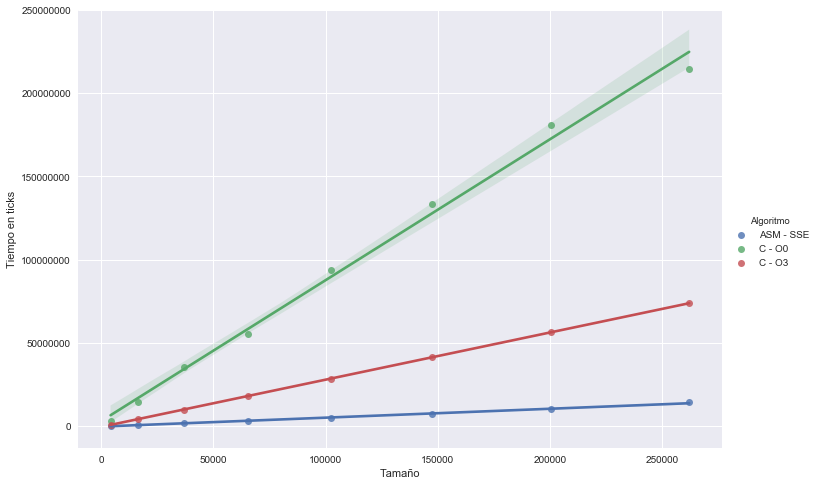

In [43]:
g = sns.lmplot(x='Tamaño', y='Ticks', data=dfMaxCloser, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# Experimentos

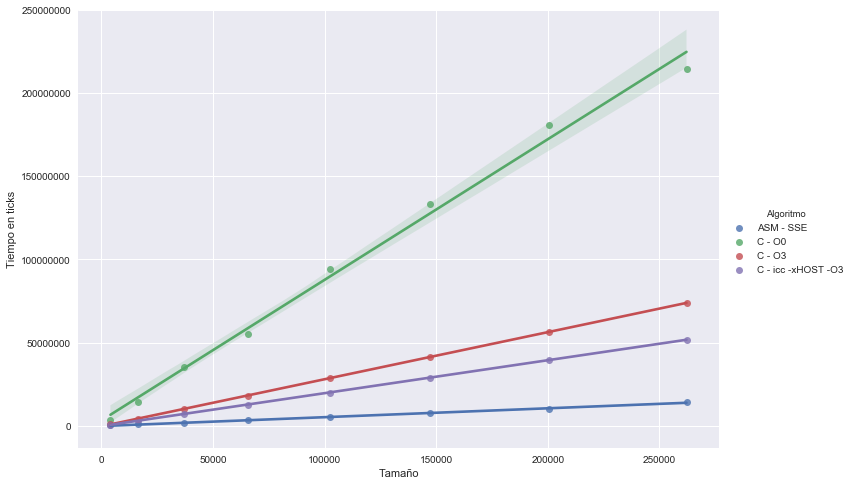

In [47]:
dfIntel = pd.read_csv('maxCloser-intel.csv')
dfIntel['Algoritmo'] = dfIntel['Algoritmo'].map({0: 'C - icc -xHOST -O3'})

df = pd.concat([dfMaxCloser, dfIntel], ignore_index=True)
df = df.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

g = sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

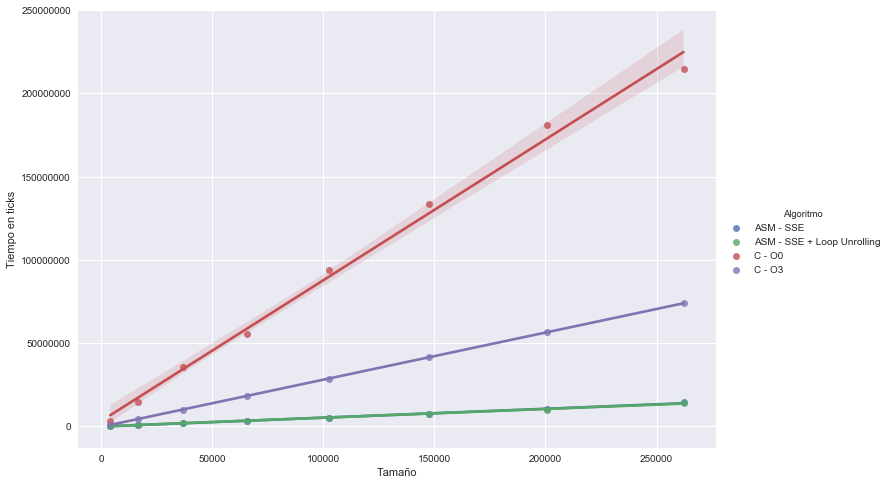

In [51]:
dfUnroll = pd.read_csv('maxCloser-unroll.csv')
dfUnroll['Algoritmo'] = dfUnroll['Algoritmo'].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfMaxCloser, dfUnroll], ignore_index=True)
df = df.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

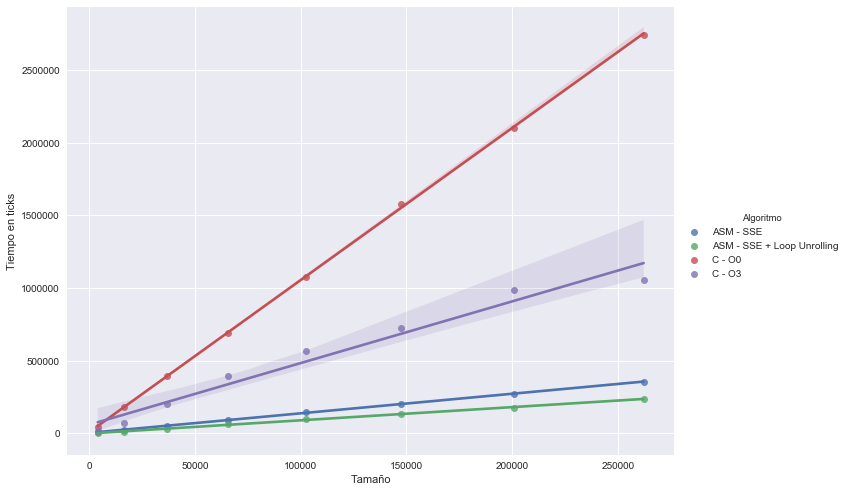

In [52]:
dfUnroll = pd.read_csv('fourCombine-unroll.csv')
dfUnroll['Algoritmo'] = dfUnroll['Algoritmo'].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfFourCombine, dfUnroll], ignore_index=True)
df = df.groupby(['Algoritmo', 'Tamaño']).min().reset_index()

sns.lmplot(x='Tamaño', y='Ticks', data=df, hue='Algoritmo', truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()